### Homework 7
**1.(a)** See Attachment
<br>**1.(b)**
Save as `interp_monomials.m` in working directory.

```
function [c,p] = interp_monomials(x,y)

[n,m] = size(x); %test if column vec
[y1,y2] = size(y); %test if column vec

if n == 1
    x = x';
    [n,m] = size(x); %switch from row to col
end

if y1 == 1 %switch from row to col
    y = y'
end


for i = 1:n
    for j = 1:m
        for k = 1:n
            p(i,k) = x(i,j)^(k-1); %raise each x to n by col position, x^0 = 1
        end
    end
end
c = p\y;
c = c(end:-1:1); %reverse order of coeffs to use polyval()
end
```

**1.(c)** Using `interp_monomials(x,y)` with:$$f(x) = \frac{1}{1+25x^{2}} $$

In [1]:
clear, clc, close all
warning('off','all')
format compact

f = @(x) 1./(1+25.*x.^2)

a = -1; b = 1;
brac = [a,b];
window = [a-0.1,b+0.1];
gimme = 6; %setting up a max n for plots
gimme2 = 20; %setting a different n for testing errors etc.
n = [2:1:gimme]; %plot n's
n2 = [2:1:gimme2]; %interpolation error n's
intv = b-a;

f =
  function_handle with value:
    @(x)1./(1+25.*x.^2)



Monomial Interpolation Error for:
n = 2  is  0
n = 3  is  0
n = 4  is  2.7756e-17
n = 5  is  1.1102e-16
n = 6  is  1.6376e-15   k(A) = 189.814113,(deg = 5)
n = 7  is  8.8818e-16   k(A) = 535.353118,(deg = 6)
n = 8  is  1.9706e-15   k(A) = 1605.443700,(deg = 7)
n = 9  is  3.0601e-15   k(A) = 4626.449923,(deg = 8)
n = 10  is  9.0219e-14   k(A) = 13951.626931,(deg = 9)
n = 11  is  5.2264e-14   k(A) = 40754.881842,(deg = 10)
n = 12  is  3.1264e-13   k(A) = 123389.737997,(deg = 11)
n = 13  is  1.1882e-13   k(A) = 363830.757695,(deg = 12)
n = 14  is  1.2525e-12   k(A) = 1104808.529383,(deg = 13)
n = 15  is  6.7265e-13   k(A) = 3280031.655661,(deg = 14)
n = 16  is  9.6341e-12   k(A) = 9983123.891408,(deg = 15)
n = 17  is  5.6022e-12   k(A) = 29793597.400269,(deg = 16)
n = 18  is  5.7649e-11   k(A) = 90847309.605172,(deg = 17)
n = 19  is  7.3591e-11   k(A) = 272240824.154596,(deg = 18)
n = 20  is  2.6927e-10   k(A) = 831377049.332707,(deg = 19)

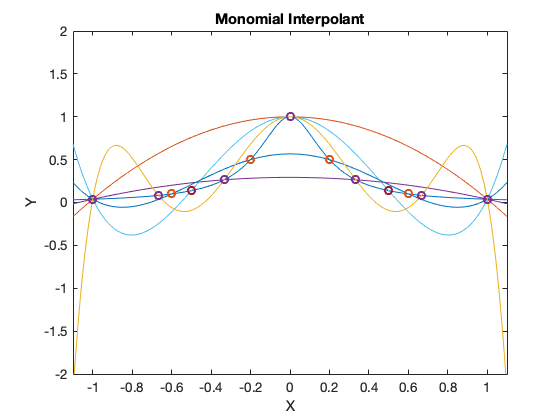

In [2]:
%plot inline

%plotting input function
x = zeros(max(n),length(n)); %storing test nodes as col vecs in matrix
fplot(f,window); %fplotting f(x) [fine grid]
ylim([-2,2]) %setting window to show detail around x = 0 

title('Monomial Interpolant')
xlabel('X')
ylabel('Y')

hold on


for i = 1:length(n)
x([1:n(i)+1],i) = [a:(b-a)/n(i):b]; %test knot vecs are in col-matrix [x1,x2,..xN]
rawdom = x([1:n(i)+1],i); %extracting knots per n values
y = f(rawdom); %evaluating function at knots for interp_monomials
c = interp_monomials(rawdom,y); %outputting coeffecients with monomial basis
p_x = poly2sym(c); %changing coeffs into symbolic poly function for plotting

fplot(p_x,window) %plot poly®nomial with monomial basis

dom = sort(rawdom); %sorting x values (in case (x,y) data is not increasing in x
rng = f(dom); %evaluating f at knots for plotting
scatter(dom,rng); %scattering data points
end

fprintf('\nMonomial Interpolation Error for:')
for i = 1:length(n2)
x2([1:n2(i)+1],i) = [a:(b-a)/n2(i):b]; %pulling nodes for (a-b)/n partition
rawdom = x2([1:n2(i)+1],i);
dom = sort(rawdom); %sorting nodes (this is handy later for Chebyshev)
y = f(dom); %evaluating f at nodes

[c,p] = interp_monomials(dom,y);  %using fun

p_x2 = poly2sym(c); %creating symbolic polynom function from coeffs vector (easy to eval)
error_mon = y - double(subs(p_x2,dom)); error_mon = abs(error_mon); %error at knots, find n for interp failure

fprintf('\nn = %g  is  %.5g', [n2(i),max(error_mon)])
%fprintf('\nMonomial Poly: '),disp(p_x2)  %optionally print the polynomial 

if max(error_mon) > eps(1) %checking if y_i and p(x_i) differ by at least mach - epsilon
    condA = cond(p); n_stor = n2(i); 
    fprintf('   k(A) = %f,(deg = %g)', [condA, n_stor-1]) %print cond(A) where interp fails
end
end

**1(c)** Comments: Around n = 6 we already begin to have the monomial-basis interpolating-polynomial 
<br> supplying outputs P(x) = y which are significantly different from F(x) = y
<br>That is$$| F(x)-P(x) | > \epsilon_m $$
<br>The condition number at n = 6,  (5th degree polynomial)  is ~ 189 and cond(A) grows roughly by 10^(2+n/2) beyond that. 
<br>From Homework 2 Prob.4 we see that x^n and x^(n+1) become epsilon close for very large n with 0 < x < 1. <br>In the column view it becomes apparent that the col-vecs of our V matrix  will begin to appear linearly dependent,
<br> and the solution is inside an increasingly 'hazy' epsilon band.
<br>(i.e. the solution basis (monomial-basis) vectors start to 'look' parallel.
<br>This is reflected in the "ill" condition number of our matrix.

**2.**
<br> Save as `lagrange_poly.m` in working directory.
```
function [l_p,l_t] = lagrange_poly(x,y)
n = length(x);

for i = 1:n
    temp = @(t) 1; %starting with 1 as the leading factor
    j = 1;
    while j < i
        temp = @(t) temp(t)*(t-x(j))/(x(i) - x(j)); %multiplying linear factors for xj < xi
    j = j+1;
    end
    
    j = j+1;
    
    while (j > i) & (j <= n)
        temp = @(t) temp(t)*(t-x(j))/(x(i) - x(j)); %multiplying linear factors for xj > xi 
    j = j+1;
    end
    l_t{i} = temp; %storing Lagrange cardinal polynomials in cell-array
end

l_p = @(s) 0;
for i = 1:n        %adding cell-array contents dotted with solution as function handle
    l_p = @(s) l_p(s) + l_t{i}(s)*y(i); %resulting in @fun lagrange poly.
end 
end
```


Lagrange Interp. Error for:
 n = 2 is 0
 n = 3 is 0
 n = 4 is 0
 n = 5 is 1.1102e-16
 n = 6 is 1.3878e-17
 n = 7 is 1.1102e-16
 n = 8 is 0
 n = 9 is 2.2204e-16
 n = 10 is 1.1102e-16
 n = 11 is 3.3307e-16
 n = 12 is 2.2204e-16
 n = 13 is 1.1102e-16
 n = 14 is 1.6653e-16
 n = 15 is 1.1102e-16
 n = 16 is 0
 n = 17 is 1.1102e-16
 n = 18 is 2.2204e-16
 n = 19 is 2.2204e-16
 n = 20 is 1.1102e-16

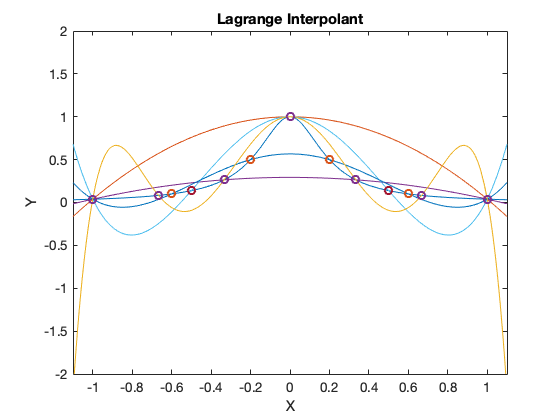

In [3]:
fprintf('\n')

%2
%plotting input function
x2 = zeros(max(n2),length(n2));
figure
fplot(f,window)
ylim([-2,2])

title('Lagrange Interpolant')
xlabel('X')
ylabel('Y')

hold on


for i = 1:length(n)
x([1:n(i)+1],i) = [a:(b-a)/n(i):b]; %test knots vecs are in col-matrix
rawdom = x([1:n(i)+1],i); %extracting knots per n values
y = f(rawdom); %evaluating f at knots for lagrange_poly
l_x = lagrange_poly(rawdom,y); %outputting langrage polynomial

fplot(l_x,window); %plotting langrage polynomial as function


dom = sort(rawdom); %sorting data points in case out of order
rng = f(dom); %evaluating f for scatter, ordered in x
scatter(dom,rng); %scattering data points
end

fprintf('Lagrange Interp. Error for:')

for i = 1:length(n2)
x2([1:n2(i)+1],i) = [a:(b-a)/n2(i):b]; %pulling nodes for (a-b)/n partition
rawdom = x2([1:n2(i)+1],i);
dom = sort(rawdom); %sorting nodes (this is handy later for Chebyshev)
y = f(dom);

l_x2 = lagrange_poly(dom,y); %generating lagrange poly anonymous function
l_x2 = sym(l_x2); %turned @ fun into sym function to keep code the same below (easy)

error_mon = y - double(subs(l_x2,dom)); error_mon = abs(error_mon);
fprintf('\n n = %g is %.5g', [n2(i),max(error_mon)])
%fprintf('\nLagrange Poly:'),disp(l_x2)
end


**2.** Comments: We see a similar behavior as that of the monomial basis interpolating polynomial.
<br> However the Lagrange interpolation method kept F(xi) = yi = P(xi) for n-values that completely
<br> broke down under monomial interpolation.

**3.**

Langrange Interpolation error for Cheybshev at:
 n = 100 is 1.1102e-15
 n = 101 is 1.3323e-15
 n = 102 is 1.4433e-15
 n = 103 is 9.992e-16
 n = 104 is 1.1102e-15
 n = 105 is 1.1102e-15

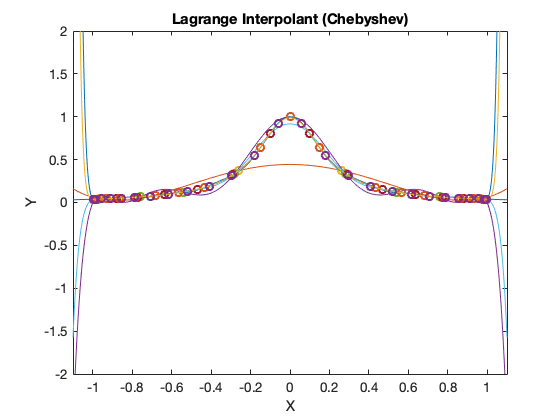

In [4]:
%plot inline
n = [5:5:25]; %plot n's
n2 = [100:1:105]; %interpolation error n's
x3 = zeros(max(n2),length(n2));

figure
fplot(f,window);
ylim([-2,2])

title('Lagrange Interpolant (Chebyshev)')
xlabel('X')
ylabel('Y')

hold on

for i = 1:length(n)  %using n values for plot (gimme variable)
        nodz = [];
    for k = 0:n(i)
        nodz = [nodz, cos( [(2*k+1)*pi] / [2*n(i)+2] )]; %creating Chebyshev nodes (in lieu of (a-b)/n)
    end
x3([1:n(i)+1],i) = nodz; %test knots vecs are in col-matrix
rawdom = x3([1:n(i)+1],i); %extracting knots per n values
y = f(rawdom); %evaluating f at knots for lagrange_poly
l_x = lagrange_poly(rawdom,y); %outputting langrage polynomial

fplot(l_x,window); %plotting langrage polynomial as function
%fplot(f,window); %plotting given f 

dom = sort(rawdom); %sorting data points in case out of order
rng = f(dom); %evaluating f for scatter, ordered in x
scatter(dom,rng); %scattering data points
end

fprintf('Langrange Interpolation error for Cheybshev at:')
for i = 1:length(n2) %using different n values for showing error (gimme 2)
    nodz2 = [];
    for k = 0:n2(i)
        nodz2 = [nodz2, cos( [(2*k+1)*pi] / [2*n2(i)+2] )]; %Chebyshev nodes
    end
x3([1:n2(i)+1],i) = nodz2; %storing nodes in matrix by column
rawdom = x3([1:n2(i)+1],i);

dom = sort(rawdom); %sorting nodes ascending
y = f(dom); %evaluating f at nodes

l_x2 = lagrange_poly(dom,y); %same as before
l_x2 = sym(l_x2); %same
error_mon = y - double(subs(l_x2,dom)); error_mon = abs(error_mon);
fprintf('\n n = %g is %.5g', [n2(i),max(error_mon)])
%fprintf('\nLagrange Poly:'),disp(l_x2)
end


**3.** Comments: It seems literally impossible to get the interpolation (eg constructing a polynomial such that 
<br> F(xi) = P(xi) = yi ) fails. This makes sense, because even with an uncountably large set of 'distinct' x 
<br> nodes, with Lagrange interpolation each distinct xj will be a root in each Lagrange cardinal Poly. l_i(x)
<br> for each xi, the cardinal Poly. l_i(xi) = 1 , which is multiplied by yi, so P(xi) = yi as long as each
<br> node is distinct. So interpolation should never fail.

**4.**
<br>Save as `lagrange_error.m` in directory, depends on `lagrange_poly.m`
```
function Merror = lagrange_error(f,n,brac,resolution)
a = brac(1);
b = brac(2);
grid = linspace(a,b,resolution);

for i = 1:length(n)
    nodz = [];
    for k = 0:n(i)
        nodz = [nodz, cos( [(2*k+1)*pi] / [2*n(i)+2] )];
    end
dom = sort(nodz);
rng = f(dom);
l_x = lagrange_poly(dom,rng);
subplot(2,1,1)
hold on
fplot(l_x,[a,b])
fplot(f,[a,b])
%scatter(nodz,f(nodz))
hold off

abs_err = [];
for p = grid
    abs_err = [abs_err,abs(f(p)- l_x(p))];
end
[M,loc] =max(abs_err);
N = n(i); M;
Merror(i) = M;
end
subplot(2,1,2)
semilogy(n,Merror)
end
```

f1 =
  function_handle with value:
    @sin
f2 =
  function_handle with value:
    @(x)abs(x)


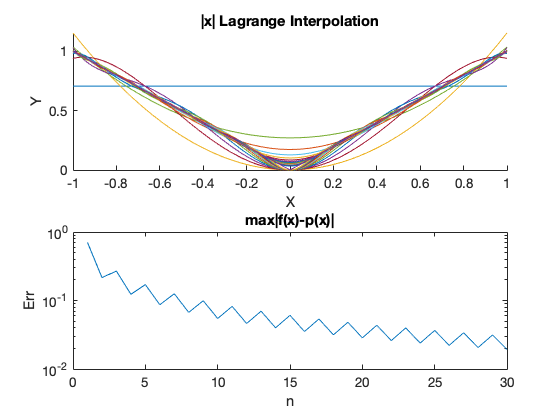

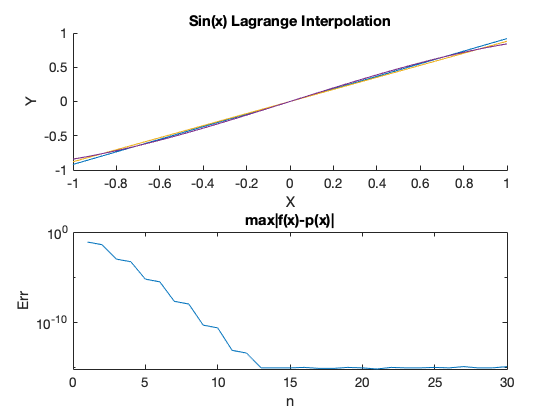

In [5]:
%plot inline
clear, clc, close all
n  = [1:30];
a = -1; b = 1;
brac = [a,b];
resolution = 500;

%f = @(x) 1./(1+25.*x.^2)
 f1 = @sin
 f2 = @(x) abs(x)

Max1 = lagrange_error(f1,n,brac,resolution);

subplot(2,1,1)
title('Sin(x) Lagrange Interpolation')
xlabel('X')
ylabel('Y')

subplot(2,1,2)
title('max|f(x)-p(x)|')
xlabel('n')
ylabel('Err')

figure

Max2 = lagrange_error(f2,n,brac,resolution);

subplot(2,1,1)
title('|x| Lagrange Interpolation')
xlabel('X')
ylabel('Y')

subplot(2,1,2)
title('max|f(x)-p(x)|')
xlabel('n')
ylabel('Err')

In [6]:
Max1, Max2

Max1 =
  Columns 1 through 3
         0.077254385057672        0.0396273405740236      0.000993042566655666
  Columns 4 through 6
      0.000504361306467804      5.98835411269594e-06      3.02360015577707e-06
  Columns 7 through 9
      2.09491578528898e-08      1.05433501929042e-08      4.78433959116842e-11
  Columns 10 through 12
      2.40340525259342e-11      7.71605002114484e-14       3.8746783559418e-14
  Columns 13 through 15
      8.88178419700125e-16      8.88178419700125e-16      8.88178419700125e-16
  Columns 16 through 18
      9.99200722162641e-16       7.7715611723761e-16       7.7715611723761e-16
  Columns 19 through 21
      9.99200722162641e-16      8.88178419700125e-16      6.66133814775094e-16
  Columns 22 through 24
      9.99200722162641e-16      8.88178419700125e-16      8.88178419700125e-16
  Columns 25 through 27
      9.99200722162641e-16      8.88178419700125e-16      1.22124532708767e-15
  Columns 28 through 30
      8.88178419700125e-16      8.88178419700125

Comments: The overall error is not convergent for Lagrange (Chebyshev) interpolation on f = |x|. The functions <br>lack of smoothness about the origin is likely the source of the oscillatory nature of the error 
<br>as n --> inf. This makes sense, since with even n, no x node will be located at the origin 
<br>by constrction of Chevyshev points. So the polynomial will not have a root at 0 for even n, 
<br>but will for odd n, hence we should expect some oscillatory error.

<br>Also, unlike a linear scalar function, the Lagrange interpolating polynomial will be concave betwee certain
<br>nodes (since |x| is monotonic decreasing for x<0, and increasing for x>0). This introduces a "waviness"
<br> to the polynomial as it pass through (xj,yj) to (xj+1,yj+1). 

<br>For the sin function Lagrange interpolation shows a relatively quick convergence to 0 in max error. 
<br>This makes sense since quite literally the issues with the |x| function are mostly absent from sin(x) 
<br>on this I = [a,b]. Sin(x) is smooth, monotonically increasing on the domain.

<br>*We see monomials used in expanding sin with a Taylor polynomial, so sin in this domain*
<br>*ought to be "close" to linearly dependent in a monomial "space", eg. represented by a polynomial*.